In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm
from stargazer.stargazer import Stargazer


pd.set_option('display.max_columns', None) 

In [2]:
# # pip install pyreadstat
# !pip install stargazer

In [3]:
import pyreadstat

# Замените 'путь_к_файлу.sav' на путь к вашему файлу


In [4]:
data2012, meta = pyreadstat.read_sav('r21i_os_71.sav')

In [5]:
data2021, meta = pyreadstat.read_sav('r30i_os_73.sav')

In [6]:
# Удаление дубликатов строк
data2012 = data2012.drop_duplicates()

# Удаление столбцов, где все значения NaN
# data2012 = data2012.dropna(axis=1, how='all')

In [7]:
# Удаление дубликатов строк
data2021 = data2021.drop_duplicates()

# Удаление столбцов, где все значения NaN
# data2021 = data2021.dropna(axis=1)

In [8]:
data2012 = data2012.loc[data2012['region'].isin([137, 141])]
data2012

idind  qredid_i        qid_i      qid_h        pid_i      pid_h  \
2112    9348.0  668202.0  137003402.0  1370034.0  137003402.0  1370034.0   
2113    9371.0  255701.0  137006001.0  1370060.0  137006001.0  1370060.0   
2114    9372.0  255702.0  137006002.0  1370060.0  137006002.0  1370060.0   
2115    9373.0  255703.0  137006003.0  1370060.0  137006003.0  1370060.0   
2116    9374.0  255704.0  137006004.0  1370060.0  137006004.0  1370060.0   
...        ...       ...          ...        ...          ...        ...   
16846  47695.0  702803.0  141431903.0  1414319.0          NaN        NaN   
16847  47696.0  702901.0  141432001.0  1414320.0          NaN        NaN   
16848  47697.0  702902.0  141432002.0  1414320.0          NaN        NaN   
16849  47698.0  702903.0  141432003.0  1414320.0          NaN        NaN   
17089  54159.0  689201.0  141227101.0  1412271.0          NaN        NaN   

             oid_i      oid_h       nid_i     nid_h         mid_i       mid_h  \
2112   137003402.0  1370034.0  13703402.0  137034.0  1.370200e+09  13702004.0   
2113   137006001.0  1370060.0  13706001.0  137060.0  1.370301e+09  13703010.0   
2114   137006002.0  1370060.0  13706002.0  137060.0  1.370301e+09  13703010.0   
2115   137006003.0  1370060.0  13706003.0  137060.0  1.370301e+09  13703010.0   
2116   137006004.0  1370060.0  13706004.0  137060.0  1.370301e+09  13703010.0   
...            ...        ...         ...       ...           ...         ...   
16846          NaN        NaN         NaN       NaN           NaN         NaN   
16847          NaN        NaN         NaN       NaN           NaN         NaN   
16848          NaN        NaN         NaN       NaN           NaN         NaN   
16849          NaN        NaN         NaN       NaN           NaN         NaN   
17089          NaN        NaN         NaN       NaN           NaN         NaN   

              lid_i       lid_h         kid_i       kid_h        jid_i  \
2112   1.370200e+09  13702004.0  1.370200e+09  13702004.0  137020402.0   
2113   1.370301e+09  13703010.0  1.370301e+09  13703010.0  137031001.0   
2114            NaN         NaN  1.370301e+09  13703010.0  137031002.0   
2115   1.370301e+09  13703010.0           NaN         NaN          NaN   
2116   1.370301e+09  13703010.0  1.370301e+09  13703010.0  137031004.0   
...             ...         ...           ...         ...          ...   
16846           NaN         NaN           NaN         NaN          NaN   
16847           NaN         NaN           NaN         NaN          NaN   
16848           NaN         NaN           NaN         NaN          NaN   
16849           NaN         NaN           NaN         NaN          NaN   
17089           NaN         NaN           NaN         NaN          NaN   

           jid_h        iid_i      iid_h        hid_i      hid_h        gid_i  \
2112   1370204.0  137020402.0  1370204.0  137020402.0  1370204.0  137020402.0   
2113   1370310.0  137031001.0  1370310.0  137031001.0  1370310.0  137031001.0   
2114   1370310.0  137031002.0  1370310.0  137031002.0  1370310.0  137031002.0   
2115         NaN  137031003.0  1370310.0  137031003.0  1370310.0  137031003.0   
2116   1370310.0  137031004.0  1370310.0  137031004.0  1370310.0  137031004.0   
...          ...          ...        ...          ...        ...          ...   
16846        NaN          NaN        NaN          NaN        NaN          NaN   
16847        NaN          NaN        NaN          NaN        NaN          NaN   
16848        NaN          NaN        NaN          NaN        NaN          NaN   
16849        NaN          NaN        NaN          NaN        NaN          NaN   
17089        NaN          NaN        NaN          NaN        NaN          NaN   

           gid_h        fid_i      fid_h        eid_i      eid_h        did_i  \
2112   1370204.0  137020402.0  1370204.0  137020402.0  1370204.0  137020402.0   
2113   1370310.0  137031001.0  1370310.0  137031001.0  1370310.0  137031001.0   
2114   1370310.0  

In [9]:
data2012['region'].value_counts()

region
141.0    480
137.0    464
Name: count, dtype: int64

In [10]:
data2021 = data2021.loc[data2021['region'].isin([137, 141])]
data2021

,idind,zredid_i,zid_i,zid_h,yid_i,yid_h,xid_i,xid_h,wid_i,wid_h,vid_i,vid_h,uid_i,uid_h,tid_i,tid_h,sid_i,sid_h,rid_i,rid_h,qid_i,qid_h,pid_i,pid_h,oid_i,oid_h,nid_i,nid_h,mid_i,mid_h,lid_i,lid_h,kid_i,kid_h,jid_i,jid_h,iid_i,iid_h,hid_i,hid_h,gid_i,gid_h,fid_i,fid_h,eid_i,eid_h,did_i,did_h,cid_i,cid_h,bid_i,bid_h,aid_i,aid_h,z_origsm,z_inwgt,psu,site,status,popul,z_adult,z_child,z_marst,z_occup08,z_int_y,z_born_m,z_educ,z_diplom,z_age,region,zh3,zh4,zh4.1,zh4.1_y,zh5,zh6,zh7.1,zh7.2,zh8a,zh8b,zi1,zi2,zi3,zi7,zi8,zi3.1,zi4,zj1,zj1.1.1,zj1.1.2,zj1.1.3,zj1.1.4,zj2cod08,zj4.1,zj5a,zj5b,zj6,zj6.0,zj6.1a,zj6.1b,zj6.2,zj7,zj7.1,zj8,zj8.1,zj8.2,zj8.3,zj9,zj10,zj10.3,zj10.2,zj11,zj11.1,zj11.2,zj13,zj13.2,zj14,zj15,zj16,zj18.2,zj19,zj21a,zj21b,zj21.3,zj23,zj24,zj25,zj26,zj29,zj29c.1,zj29c.2,zj22,zj31,zj29.1,zj29.2.1,zj29.2.2,zj29.2.3,zj32,zj32.1,zj33cod08,zj35.1,zj36.1a,zj36.1b,zj36.2,zj37,zj38,zj39,zj40,zj41,zj41.1,zj41.2,zj43,zj49,zj50,zj51,zj52,zj56,zj56.11c08,zj56.12c08,zj56.13c08,zj57,zj58,zj58.1,zj59,zj59.1,zj60,zj60.4a1,zj60.4a2,zj60.4a3,zj604a0,zj60.4a7,zj60.4a8,zj60.4a9,zj60.5a,zj61,zj62,zj63,zj64,zj65,zj66,zj66.1,zj69.9c,zj70.1,zj70,zj70.2,zk3.1,zk3.5,zk3.2,zk3.3,zk3.4,zj317,zj318,zj319,zj71,zj72.1a,zj72.1b,zj721dac08,zj72.1c,zj72.1e,zj72.1a2,zj72.1b2,zj721dbc08,zj72.1c2,zj72.1e2,zj72.1a3,zj72.1b3,zj721dcc08,zj72.1c3,zj72.1e3,zj72.1a4,zj72.1b4,zj721ddc08,zj72.1c4,zj72.1e4,zj72.1a5,zj72.1b5,zj721dec08,zj72.1c5,zj72.1e5,zj72.2a,zj72.2b,zj722dac08,zj72.2c,zj72.2e,zj72.2h,zj72.2a2,zj72.2b2,zj722dbc08,zj72.2c2,zj72.2e2,zj72.2h2,zj72.3a,zj72.3b,zj723dac08,zj72.3c,zj72.3e,zj72.3h,zj72.3a2,zj72.3b2,zj723dbc08,zj72.3c2,zj72.3e2,zj72.3h2,zj72.4a,zj72.4b,zj724dac08,zj72.4c,zj72.4e,zj72.4h,zj72.4a2,zj72.4b2,zj724dbc08,zj72.4c2,zj72.4e2,zj72.4h2,zj72.5a,zj72.5b,zj725dac08,zj72.5c,zj72.5e,zj72.5h,zj72.5j,zj72.5a2,zj72.5b2,zj725dbc08,zj72.5c2,zj72.5e2,zj72.5h2,zj72.5j2,zj72.5a3,zj72.5b3,zj725dcc08,zj72.5c3,zj72.5e3,zj72.5h3,zj72.5j3,zj72.5a4,zj72.5b4,zj725ddc08,zj72.5c4,zj72.5e4,zj72.5h4,zj72.5j4,zj72.51,zj72.6a,zj72.6b,zj726dac08,zj72.6c,zj72.6e,zj72.6h,zj72.6a2,zj72.6b2,zj726dbc08,zj72.6c2,zj72.6e2,zj72.6h2,zj72.18a,zj60.1,zj77,zj72.11,zj72121ac08,zj72121c,zj72121e,zj371,zj72121b,zj72121d,zj260,zj262,zj123,zj125.1,zj125.2,zj125.3,zj125.4,zj125.10,zj125.9,zj401.1a,zj401.2a,zj401.3a,zj401.5a,zj322,zj323m,zj323y,zj324,zj325m,zj325y,zj72.171,zj72.172,zj72.173,zj72.19,zj72.18,zj131.1,zj73,zj73.1m,zj73.1y,zj238,zj73.3y,zj73.3m,zj259,zj73.4y,zj73.4m,zj74.1a,zj74.1b,zj74.1c,zj75,zj363,zj78,zj161.3y,zj161.3m,zj80a,zj80b,zj80.1,zj80.2c08,zj85,zj86,zj87,zj88,zj89,zj89.1,zj81,zj81.2,zj81.1,zj82,zj83.1,zj83.2,zj83.3,zj83.4,zj83.5,zj83.6,zj83.7,zj83.8,zj136,zj84.1,zj84.2,zj90,zj206,zl2.2,zl3.1.2,zl5.0,zl5,zl5.1,zl58,zl89,zl90,zl20,zl23,zl26,zm1,zm2,zm2.1,zm3,zm20.61,zm20.62,zm20.63,zm20.64,zm20.65,zm20.66,zm20.620,zm20.69,zm20.610,zm20.611,zm20.612,zm20.613,zm20.615,zm20.616,zm20.617,zm20.618,zm20.614,zm20.619,zm20.67,zm20.7,zm20.8,zm20.9m,zm20.9y,zm39,zm43,zm46,zm58.1,zm59,zm62,zm62.1,zm62.3,zm62.51,zm62.52,zm62.53,zm62.56,zm131,zm64,zm66,zm71,zm72,zm73,zm77,zm78,zm79,zm189,zm80.0,zm80,zm190,zm82.1,zm82.3,zm83.2,zm83.3,zm83.4,zm83.5,zm84111a,zm84111b,zm84111d,zm84112a,zm84112b,zm84112d,zm84.12a,zm84.12b,zm84.12d,zm84.8a,zm84.8b,zm84.8d,zm84.21a,zm84.21b,zm84.21d,zm84.31a,zm84.31b,zm84.31d,zm84.4a,zm84.4b,zm84.4d,zm84.5a,zm84.5b,zm84.5d,zm84.9a,zm84.9b,zm84.9d,zm84.7a,zm84.7b,zm84.7d,zm84.6a,zm84.6b,zm84.6d,zm113.1a,zm113.1b,zm113.1c,zm113.1d,zm11311a,zm11311b,zm11311c,zm11311d,zm11312a,zm11312b,zm11312c,zm11312d,zm11313a,zm11313b,zm11313c,zm11313d,zm11314a,zm11314b,zm11314c,zm11314d,zm113.2a,zm113.2b,zm113.2c,zm113.2d,zm113.3a,zm113.3b,zm113.3c,zm113.3d,zm113.4a,zm113.4b,zm113.4c,zm113.4d,zm113.5a,zm113.5b,zm113.5c,zm113.5d,zm11351a,zm11351b,zm11351c,zm11351d,zm113.6a,zm113.6b,zm113.6c,zm113.6d,zm114,zn1.1,zn1.2,zn1.3,zn1.4,zn1.5,zn1.6,zn2,zn4,zn6,zn6.1,zn30,zn31,zn31.1,zn31.2,zn31.3,zn60,zn72,zn61m,zn61y,zs1.1,zs1.2,zs2,zs3,zs4,zs5,zs6,zs7,zh11,zk7.1

In [11]:
data2021['region'].value_counts()

region
141.0    425
137.0    365
Name: count, dtype: int64

In [12]:
# data2012.columns

In [13]:
my_list = ['J125.6', 'J721631', 'J721632', 'J721635', 'J72.171', 'J73', 'J77', 'J87', 'J90', 'J200', 'J13.2', 'J72.172', 'J1.1.1']
lowercase_list = [x.lower() if isinstance(x, str) else x for x in my_list]

In [14]:
filtered_columns = [col for col in data2012.columns if lowercase_list[-1] in col]
print(filtered_columns)

['qj1.1.1']


In [15]:
# filtered_column =[]

In [16]:
# filtered_column.extend(filtered_columns)
# print(filtered_column)

In [17]:
# print(data2012.columns.tolist())

In [18]:
# itog_list = ['zh5', 'zh6', 'z_age', 'z_educ', 'z_diplom', 'z_marst', 'z_occup08', 'zj6', 'zj6.1a', 'zj6.2', 'zj8', 'status', 'zj4.1',
# 'zj10', 'zj11.1', 'zj14', 'zj21a', 'zj23', 'zj29', 'zj32.1', 'zj35.1', 'zj69.9c', 'zj75', 'zj260', 'zl2.2']

In [19]:
df_filter = data2012[['qj125.6', 'qj721631', 'qj721632', 'qj721635', 'qj72.171', 'qj73', 'qj77', 'qj87', 'qj90', 'qj200','qh5', 'qh6', 'q_age', 'q_educ', 'q_diplom', 'q_marst', 'q_occup08', 'qj6', 'qj6.1a', 'qj6.2', 'qj8', 'status', 'qj4.1',
'qj10', 'qj11.1', 'qj14', 'qj21a', 'qj23', 'qj29', 'qj32.1', 'qj35.1', 'qj69.9c', 'qj75', 'qj260', 'ql2.2', 'qj13.2', 'region', 'qj1.1.1']] # Наши колонки

In [20]:
df_filter.loc[:, :] = df_filter.where(df_filter <= 9999999, np.nan) # Пропуски на NA

C:\Users\zvlad\AppData\Local\Temp\ipykernel_20140\2653252281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter.loc[:, :] = df_filter.where(df_filter <= 9999999, np.nan) # Пропуски на NA


In [21]:
print("Размерность датафрейма:")
print(df_filter.shape)
print()
missing_values_count = df_filter.isna().sum() # Общее количество пропущенных значений
missing_values_percentage = (df_filter.isna().mean() * 100).round(2) # Процент пропущенных значений
unique_values_count = df_filter.nunique() # Количество уникальных значений в каждом столбце

missing_summary = pd.DataFrame({
'Missing Values Count': missing_values_count,
'Missing Values Percentage': missing_values_percentage,
'Unique Values Count': unique_values_count
})

print("Сводка по отсутствующим значениям и уникальным значениям:")
display(missing_summary)

Размерность датафрейма:
(944, 38)

Сводка по отсутствующим значениям и уникальным значениям:


,Missing Values Count,Missing Values Percentage,Unique Values Count
qj125.6,399,42.27,2
qj721631,180,19.07,2
qj721632,492,52.12,2
qj721635,587,62.18,2
qj72.171,132,13.98,2
qj73,132,13.98,2
qj77,132,13.98,2
qj87,935,99.05,2
qj90,133,14.09,12
qj200,144,15.25,2


In [22]:
df_filter = df_filter.loc[:, df_filter.isna().mean() < 0.6] # Отсееваем где много пропусков
df_filter 

,qj125.6,qj721631,qj721632,qj72.171,qj73,qj77,qj90,qj200,qh5,qh6,q_age,q_educ,q_diplom,q_marst,q_occup08,qj6,qj6.1a,qj6.2,status,qj4.1,qj10,qj11.1,qj14,qj21a,qj29,qj32.1,qj69.9c,qj260,ql2.2,region,qj1.1.1
2112,NaN,2.0,NaN,1.0,1.0,2.0,4.0,2.0,1.0,1935.0,78.0,18.0,5.0,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1935.0,2.0,2.0,137.0,NaN
2113,2.0,2.0,1.0,1.0,2.0,1.0,12.0,2.0,2.0,1968.0,43.5,11.0,3.0,2.0,8.0,2.0,12.0,48.0,2.0,1.0,11000.0,1.0,2.0,1.0,2.0,2.0,1968.0,2.0,2.0,137.0,3.0
2114,NaN,2.0,1.0,1.0,2.0,1.0,12.0,2.0,1.0,1962.0,50.0,18.0,5.0,2.0,7.0,2.0,12.0,48.0,2.0,17.0,4500.0,1.0,2.0,1.0,2.0,2.0,1962.0,2.0,2.0,137.0,3.0
2115,2.0,2.0,1.0,1.0,2.0,1.0,12.0,2.0,1.0,1987.0,25.5,11.0,3.0,2.0,3.0,2.0,12.0,48.0,2.0,1.0,21000.0,1.0,2.0,1.0,2.0,2.0,1987.0,1.0,2.0,137.0,2.0
2116,2.0,2.0,1.0,2.0,2.0,1.0,12.0,2.0,2.0,1990.0,22.0,11.0,3.0,2.0,5.0,2.0,12.0,60.0,2.0,14.0,9000.0,1.0,2.0,1.0,2.0,2.0,1990.0,1.0,2.0,137.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16846,1.0,2.0,1.0,1.0,2.0,1.0,12.0,2.0,1.0,1977.0,35.5,18.0,5.0,3.0,7.0,2.0,8.0,40.0,1.0,6.0,28000.0,1.0,2.0,1.0,2.0,2.0,1977.0,2.0,2.0,141.0,3.0
16847,1.0,2.0,1.0,1.0,2.0,1.0,12.0,2.0,1.0,1975.0,37.5,16.0,4.0,3.0,8.0,2.0,12.0,48.0,1.0,7.0,45000.0,1.0,2.0,1.0,2.0,2.0,1975.0,2.0,1.0,141.0,2.0
16848,1.0,2.0,1.0,1.0,2.0,1.0,12.0,2.0,2.0,1978.0,34.0,21.0,6.0,3.0,3.0,2.0,8.0,40.0,1.0,9.0,15000.0,1.0,2.0,1.0,2.0,2.0,1978.0,2.0,2.0,141.0,2.0
16849,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2000.0,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,2.0,141.0,NaN


In [23]:
print("Размерность датафрейма:")
print(df_filter.shape)
print()
missing_values_count = df_filter.isna().sum() # Общее количество пропущенных значений
missing_values_percentage = (df_filter.isna().mean() * 100).round(2) # Процент пропущенных значений
unique_values_count = df_filter.nunique() # Количество уникальных значений в каждом столбце

missing_summary = pd.DataFrame({
'Missing Values Count': missing_values_count,
'Missing Values Percentage': missing_values_percentage,
'Unique Values Count': unique_values_count
})

print("Сводка по отсутствующим значениям и уникальным значениям:")
display(missing_summary)

Размерность датафрейма:
(944, 31)

Сводка по отсутствующим значениям и уникальным значениям:


,Missing Values Count,Missing Values Percentage,Unique Values Count
qj125.6,399,42.27,2
qj721631,180,19.07,2
qj721632,492,52.12,2
qj72.171,132,13.98,2
qj73,132,13.98,2
qj77,132,13.98,2
qj90,133,14.09,12
qj200,144,15.25,2
qh5,0,0.00,2
qh6,0,0.00,90


In [24]:
df_filter = df_filter.drop(['qj69.9c', 'qh6', 'q_educ', 'qj4.1', 'qj77'], axis=1)

In [25]:
df_filter = df_filter.dropna(subset=['qj10',  'qj1.1.1'])#, 'ql2.2', 'qj260', 'q_marst', 'q_diplom', 'q_educ', 'qj200', 'qj90', 'qj77', 'qj73', 'qj72.171', 'qj721631'])

In [26]:
df_filter = df_filter.dropna(subset=['ql2.2', 'qj260', 'qj32.1', 'q_diplom', 'qj200', 'q_occup08'])

In [27]:
df_filter = df_filter.dropna(axis=1, how='any')

In [28]:
print("Размерность датафрейма:")
print(df_filter.shape)
print()
missing_values_count = df_filter.isna().sum() # Общее количество пропущенных значений
missing_values_percentage = (df_filter.isna().mean() * 100).round(2) # Процент пропущенных значений
unique_values_count = df_filter.nunique() # Количество уникальных значений в каждом столбце

missing_summary = pd.DataFrame({
'Missing Values Count': missing_values_count,
'Missing Values Percentage': missing_values_percentage,
'Unique Values Count': unique_values_count
})

print("Сводка по отсутствующим значениям и уникальным значениям:")
display(missing_summary)

Размерность датафрейма:
(353, 17)

Сводка по отсутствующим значениям и уникальным значениям:


,Missing Values Count,Missing Values Percentage,Unique Values Count
qj72.171,0,0.0,2
qj73,0,0.0,2
qj90,0,0.0,5
qj200,0,0.0,2
qh5,0,0.0,2
q_age,0,0.0,99
q_diplom,0,0.0,5
q_marst,0,0.0,6
q_occup08,0,0.0,8
qj6,0,0.0,2


In [29]:
# # sns.scatterplot(data=df, y='income_30d', x = 'diplom', hue='diplom')
# sns.boxplot(data=df_filter, y='qj10', x = 'qj72.172')#, hue='is_ceo')
# # plt.legend(loc=(1, 0))
# plt.xticks(rotation=60)
# plt.show()

In [30]:
# df_filter = df_filter.dropna(axis=1, how='any')

In [31]:
df_filter['region'].value_counts()

region
141.0    192
137.0    161
Name: count, dtype: int64

In [32]:
df_filter.columns

Index(['qj72.171', 'qj73', 'qj90', 'qj200', 'qh5', 'q_age', 'q_diplom',
       'q_marst', 'q_occup08', 'qj6', 'status', 'qj10', 'qj32.1', 'qj260',
       'ql2.2', 'region', 'qj1.1.1'],
      dtype='object')

In [33]:
data_dict = {
"qh5": "sex",
"qh6": "birth_year",
"q_age": "age",
"q_educ": "education",
"q_diplom": "diplom",
"q_marst": "family",
"q_occup08": "proff_group",
"qj6": "is_ceo",
"qj6.1a": "work_day_hours",
"qj6.2": "work_week_hours",
"qj8": "actual_hours_30d",
"status": "settlement_type",
"qj4.1": "industry",
"qj10": "income_30d",
"qj11.1": "officially_employed",
"qj14": "company_debt",
"qj21a": "paid_leave",
"qj23": "state_owner",
"qj29": "entrepreneur_activity",
"qj32.1": "additional_job",
"qj69.9c": "birth_year",
"qj260": "foreign_language",
"ql2.2": "additional_health_insurance",
"region": "region",
"qj72.171": "children",
"qj73": "pension",
"qj77": "employment_status",
"qj90": "main_activity",
"qj125.6": "uesed_internet_30d",
"qj721631" : "opportunity_buy_house",
"qj200" : "take_loan",
'qj1.1.1' : 'job_satisfaction'
}
clear_df = df_filter.rename(columns=data_dict)
clear_df

,children,pension,main_activity,take_loan,sex,age,diplom,family,proff_group,is_ceo,settlement_type,income_30d,additional_job,foreign_language,additional_health_insurance,region,job_satisfaction
2113,1.0,2.0,12.0,2.0,2.0,43.5,3.0,2.0,8.0,2.0,2.0,11000.0,2.0,2.0,2.0,137.0,3.0
2114,1.0,2.0,12.0,2.0,1.0,50.0,5.0,2.0,7.0,2.0,2.0,4500.0,2.0,2.0,2.0,137.0,3.0
2115,1.0,2.0,12.0,2.0,1.0,25.5,3.0,2.0,3.0,2.0,2.0,21000.0,2.0,1.0,2.0,137.0,2.0
2119,1.0,2.0,12.0,2.0,1.0,34.0,6.0,2.0,8.0,2.0,2.0,12000.0,2.0,1.0,2.0,137.0,2.0
2121,2.0,2.0,13.0,2.0,1.0,41.5,4.0,6.0,8.0,2.0,2.0,20000.0,2.0,2.0,2.0,137.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16843,1.0,2.0,12.0,2.0,1.0,35.0,5.0,2.0,3.0,1.0,1.0,45000.0,2.0,2.0,2.0,141.0,2.0
16846,1.0,2.0,12.0,2.0,1.0,35.5,5.0,3.0,7.0,2.0,1.0,28000.0,2.0,2.0,2.0,141.0,3.0
16847,1.0,2.0,12.0,2.0,1.0,37.5,4.0,3.0,8.0,2.0,1.0,45000.0,2.0,2.0,1.0,141.0,2.0
16848,1.0,2.0,12.0,2.0,2.0,34.0,6.0,3.0,3.0,2.0,1.0,15000.0,2.0,2.0,2.0,141.0,2.0


In [34]:
def replace_family(value):
    if value in [2, 6]:
        return 1 # В браке 
    else:
        return 2 # Не в браке 

# Функция для замены значений в колонке 'proff_group'
def replace_proff_group(value):
    if value in [1, 2, 7, 8]:
        return 1 # Проф работник
    else:
        return 2 # Не проф работник

# Функция для замены значений в колонке 'diplom'
def replace_diplom(value):
    if value in [1, 2, 3, 4]:
        return 1  #  Школота
    elif value == 5: 
        return 2 # Шаражники
    elif value == 6:
        return 3 # Челики с умом (дипломом шараги только ВУЗа)

# Применяем функции к соответствующим колонкам
clear_df['family'] = clear_df['family'].apply(replace_family)
clear_df['proff_group'] = clear_df['proff_group'].apply(replace_proff_group)
clear_df['diplom'] = clear_df['diplom'].apply(replace_diplom)

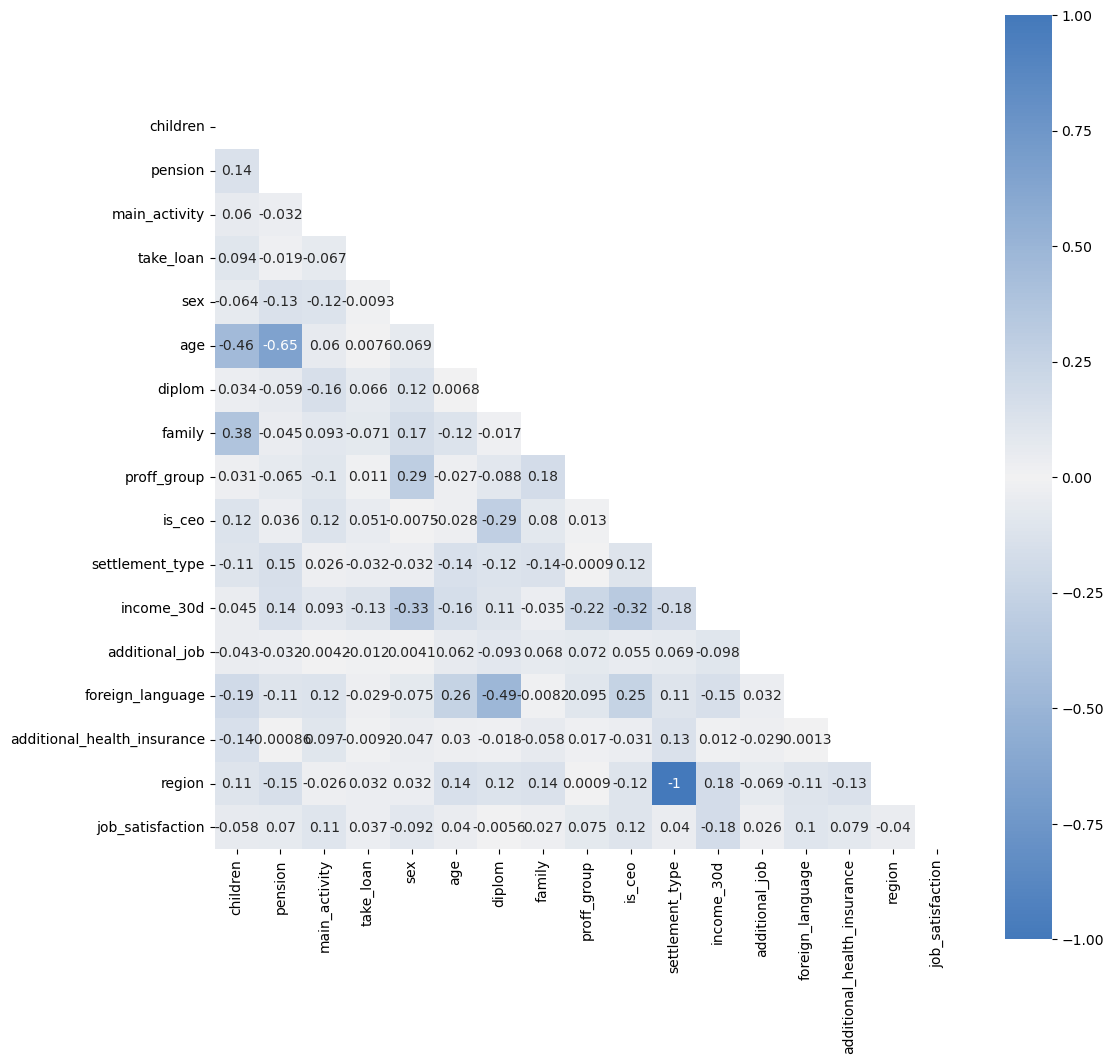

In [35]:
corr = clear_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr,
    mask=mask,
    cmap=sns.diverging_palette(250, 250, as_cmap=True),
    annot = True,
    vmin=-1.0, vmax=1.0, # всегда ставить от -1 до 1 ставим два одинаковых цвета на оба конца
    square=True,
    ax=ax);

In [36]:
clear_df.nunique()

children                        2
pension                         2
main_activity                   5
take_loan                       2
sex                             2
age                            99
diplom                          3
family                          2
proff_group                     2
is_ceo                          2
settlement_type                 2
income_30d                     77
additional_job                  2
foreign_language                2
additional_health_insurance     2
region                          2
job_satisfaction                5
dtype: int64

In [37]:
clear_df['income_30d'].value_counts().sort_index()

income_30d
50.0       1
3500.0     1
4000.0     2
4300.0     1
4500.0     4
          ..
50000.0    5
53000.0    1
55000.0    1
60000.0    5
70000.0    2
Name: count, Length: 77, dtype: int64

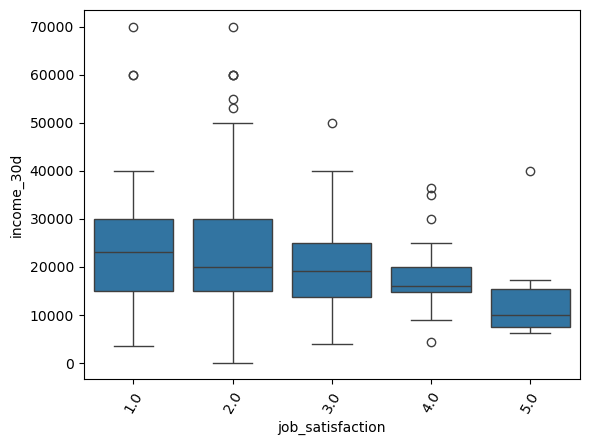

In [38]:
# sns.scatterplot(data=df, y='income_30d', x = 'diplom', hue='diplom')
sns.boxplot(data=clear_df, y='income_30d', x = 'job_satisfaction')#, hue='is_ceo')
# plt.legend(loc=(1, 0))
plt.xticks(rotation=60)
plt.show()

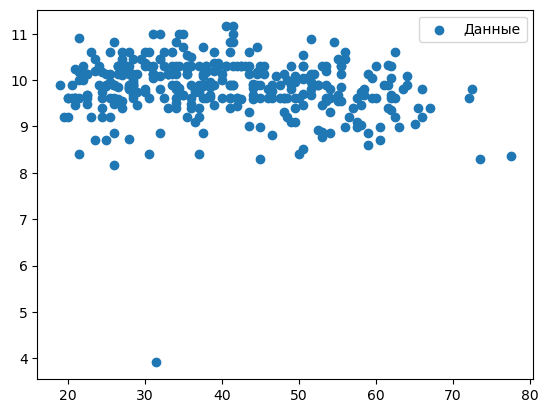

In [39]:
plt.scatter(clear_df['age'], np.log(clear_df["income_30d"]), label="Данные")
# plt.plot(clear_df[['experience_years']], y_pred, color="red", label="Квадратичная модель")
plt.legend()
plt.show()

In [40]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression

# poly = PolynomialFeatures(degree=2)
# x_poly = poly.fit_transform(clear_df[['age']])

# lwage = np.log(clear_df[['income_30d']])
# model = LinearRegression()
# model.fit(x_poly, lwage)

# # Предсказания
# y_pred = model.predict(x_poly)

# # График
# plt.scatter(clear_df[['age']], lwage, label="Данные")
# plt.plot(clear_df[['age']], y_pred, color="red", label="Квадратичная модель")
# plt.legend()
# plt.show()

In [41]:
clear_df['age'] = clear_df['age'] - clear_df['age'].mean()
clear_df['age^2'] = -clear_df['age'] ** 2

In [42]:
clear_df = clear_df.drop([2114, 13417, 15855, 3674, 16716, 16787, 16814, 16693, 3684, 3969, 11750, 13971, 15972, 2131, 3660, 6491], axis=0)

In [43]:
clear_df = clear_df.drop(['settlement_type', 'additional_job'], axis=1)

In [44]:
clear_df['region'].value_counts()

region
141.0    182
137.0    155
Name: count, dtype: int64

In [45]:
clear_df_137 = clear_df[clear_df['region'] == 137]
# clear_df_137

In [46]:
clear_df_141 = clear_df[clear_df['region'] == 141]
# clear_df_141

In [47]:
# clear_df = clear_df.drop(['age', 'additional_health_insurance', 'settlement_type', 'birth_year', 'employment_status', 'children', 'family', 'foreign_language', 'proff_group', 'region'], axis=1)

In [48]:
clear_df_137.columns

Index(['children', 'pension', 'main_activity', 'take_loan', 'sex', 'age',
       'diplom', 'family', 'proff_group', 'is_ceo', 'income_30d',
       'foreign_language', 'additional_health_insurance', 'region',
       'job_satisfaction', 'age^2'],
      dtype='object')

In [49]:
import statsmodels.api as sm

y = np.log(clear_df_137["income_30d"])
X = clear_df_137.drop(["income_30d", 'region', 'pension', 'main_activity', 'take_loan', 'age', 'is_ceo', 'foreign_language', 
                       'additional_health_insurance', 'job_satisfaction', 'age^2'], axis=1)

X = sm.add_constant(X)

# Строим OLS модель
model_rt1 = sm.OLS(y, X).fit()

# Выводим результаты
results_table = model_rt1.summary()
print(results_table)

                            OLS Regression Results                            
Dep. Variable:             income_30d   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     13.47
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           7.69e-11
Time:                        20:53:19   Log-Likelihood:                -83.208
No. Observations:                 155   AIC:                             178.4
Df Residuals:                     149   BIC:                             196.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.5112      0.182     57.808      

In [50]:
import statsmodels.api as sm

y = np.log(clear_df_137["income_30d"])
X = clear_df_137.drop(["income_30d", 'region', 'main_activity', 'take_loan','is_ceo','additional_health_insurance', 
                       'job_satisfaction', 'foreign_language','age^2'], axis=1)
X = sm.add_constant(X)

# Строим OLS модель
model_rt2 = sm.OLS(y, X).fit()

# Выводим результаты
results_table = model_rt2.summary()
print(results_table)

                            OLS Regression Results                            
Dep. Variable:             income_30d   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     12.35
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           2.23e-12
Time:                        20:53:19   Log-Likelihood:                -76.259
No. Observations:                 155   AIC:                             168.5
Df Residuals:                     147   BIC:                             192.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.0002      0.358     27.958      

In [51]:
import statsmodels.api as sm

y = np.log(clear_df_137["income_30d"])
X = clear_df_137.drop(["income_30d", 'region','additional_health_insurance','foreign_language', 'age^2'], axis=1)
X = sm.add_constant(X)

# Строим OLS модель
model_rt3 = sm.OLS(y, X).fit()

# Выводим результаты
results_table = model_rt3.summary()
print(results_table)

                            OLS Regression Results                            
Dep. Variable:             income_30d   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     21.12
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           6.55e-25
Time:                        20:53:19   Log-Likelihood:                -37.335
No. Observations:                 155   AIC:                             98.67
Df Residuals:                     143   BIC:                             135.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.5661      0.549  

In [52]:
import statsmodels.api as sm

y = np.log(clear_df_137["income_30d"])
X = clear_df_137.drop(["income_30d", 'region','additional_health_insurance', 'foreign_language'], axis=1)
X = sm.add_constant(X)

# Строим OLS модель
model_rt_final = sm.OLS(y, X).fit()

# Выводим результаты
results_table = model_rt_final.summary()
print(results_table)

                            OLS Regression Results                            
Dep. Variable:             income_30d   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     24.34
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           9.20e-29
Time:                        20:53:19   Log-Likelihood:                -25.511
No. Observations:                 155   AIC:                             77.02
Df Residuals:                     142   BIC:                             116.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               10.4155      0.540  

In [53]:
# np.linalg.cond(X)

In [54]:
# bp_test = het_breuschpagan(model.resid, model.model.exog)
# labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
# print(dict(zip(labels, bp_test)))

In [55]:
white_test = het_white(model_rt_final.resid, model_rt_final.model.exog)
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Statistic p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 69.58426723082118, 'Test Statistic p-value': 0.6237487255686989, 'F-Statistic': 0.8807070126930461, 'F-Statistic p-value': 0.7093557621380673}


Shapiro-Wilk test: ShapiroResult(statistic=0.9913078053786166, pvalue=0.46430941965708017)


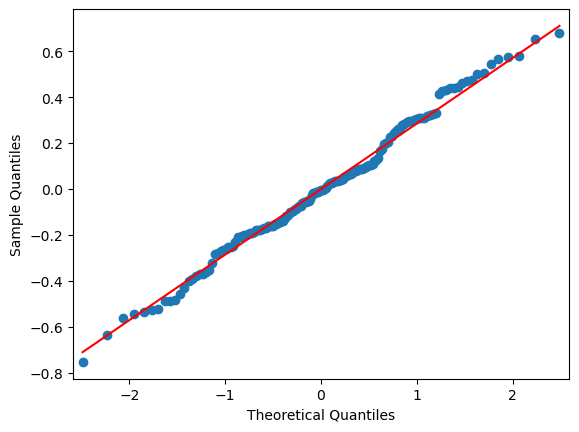

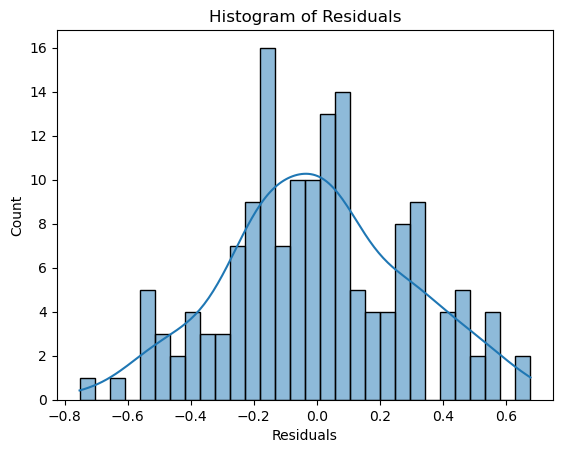

In [56]:
shapiro_test = stats.shapiro(model_rt_final.resid)
print(f"Shapiro-Wilk test: {shapiro_test}")

# Q-Q plot
sm.qqplot(model_rt_final.resid, line='s')
plt.show()

# Гистограмма остатков
sns.histplot(model_rt_final.resid, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

In [57]:
from scipy.stats import zscore
outlier_indices = model_rt_final.resid[abs(zscore(model_rt_final.resid)) > 3].index
print("Индексы выбросов:")
print(outlier_indices)

Индексы выбросов:
Index([], dtype='int64')


In [58]:
from statsmodels.stats.stattools import durbin_watson
print("Статистика Дарбина-Уотсона:", durbin_watson(model_rt_final.resid))

Статистика Дарбина-Уотсона: 2.2219614947662536


In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

             feature         VIF
0              const  507.950871
1           children    1.819202
2            pension    2.931137
3      main_activity    1.133055
4          take_loan    1.064032
5                sex    1.318434
6                age    2.267751
7             diplom    1.295260
8             family    1.265548
9        proff_group    1.353541
10            is_ceo    1.340857
11  job_satisfaction    1.095141
12             age^2    2.269779


In [60]:
# y = clear_df_137["income_30d"]
# X = clear_df_137[['sex']]

# X = sm.add_constant(X)

# # Строим OLS модель
# model = sm.OLS(y, X).fit()

# # Выводим результаты
# results_table = model.summary()
# print(results_table)

In [61]:
import statsmodels.api as sm

y = np.log(clear_df_141["income_30d"])
X = clear_df_141.drop(["income_30d", 'region', 'pension', 'main_activity', 'take_loan', 'age', 'is_ceo', 'foreign_language', 
                       'additional_health_insurance', 'job_satisfaction', 'age^2'], axis=1)

X = sm.add_constant(X)

# Строим OLS модель
model_sp1 = sm.OLS(y, X).fit()

# Выводим результаты
results_table = model_sp1.summary()
print(results_table)

                            OLS Regression Results                            
Dep. Variable:             income_30d   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     6.927
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           6.27e-06
Time:                        20:53:20   Log-Likelihood:                -92.578
No. Observations:                 182   AIC:                             197.2
Df Residuals:                     176   BIC:                             216.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.3951      0.168     61.706      

In [62]:
import statsmodels.api as sm

y = np.log(clear_df_141["income_30d"])
X = clear_df_141.drop(["income_30d", 'region', 'main_activity', 'take_loan','is_ceo','additional_health_insurance', 
                       'job_satisfaction', 'foreign_language','age^2'], axis=1)
X = sm.add_constant(X)

# Строим OLS модель
model_sp2 = sm.OLS(y, X).fit()

# Выводим результаты
results_table = model_sp2.summary()
print(results_table)

                            OLS Regression Results                            
Dep. Variable:             income_30d   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     6.692
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           5.05e-07
Time:                        20:53:20   Log-Likelihood:                -87.230
No. Observations:                 182   AIC:                             190.5
Df Residuals:                     174   BIC:                             216.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.5108      0.298     35.293      

In [63]:
import statsmodels.api as sm

y = np.log(clear_df_141["income_30d"])
X = clear_df_141.drop(["income_30d", 'region','additional_health_insurance','foreign_language', 'age^2'], axis=1)
X = sm.add_constant(X)

# Строим OLS модель
model_sp3 = sm.OLS(y, X).fit()

# Выводим результаты
results_table = model_sp3.summary()
print(results_table)

                            OLS Regression Results                            
Dep. Variable:             income_30d   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     8.963
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           1.67e-12
Time:                        20:53:20   Log-Likelihood:                -67.302
No. Observations:                 182   AIC:                             158.6
Df Residuals:                     170   BIC:                             197.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.8725      0.643  

In [64]:
import statsmodels.api as sm

y = np.log(clear_df_141["income_30d"])
X = clear_df_141.drop(["income_30d", 'region','additional_health_insurance', 'foreign_language'], axis=1)
X = sm.add_constant(X)

# Строим OLS модель
model_sp_final = sm.OLS(y, X).fit()

# Выводим результаты
results_table = model_sp_final.summary()
print(results_table)

                            OLS Regression Results                            
Dep. Variable:             income_30d   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     9.412
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           7.95e-14
Time:                        20:53:21   Log-Likelihood:                -62.350
No. Observations:                 182   AIC:                             150.7
Df Residuals:                     169   BIC:                             192.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               10.1826      0.635  

In [65]:
# y = np.log(clear_df_141["income_30d"])
# X = clear_df_141.drop(["income_30d", 'region', 'settlement_type', 'employment_status', 'birth_year', 'diplom', 'foreign_language', 'family',
#                        'education', 'pension', 'industry'], axis=1)

# X = sm.add_constant(X)

# # Строим OLS модель
# model = sm.OLS(y, X).fit()

# # Выводим результаты
# results_table = model.summary()
# print(results_table)

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

             feature         VIF
0              const  587.459391
1           children    2.012698
2            pension    2.865176
3      main_activity    1.143348
4          take_loan    1.131126
5                sex    1.202911
6                age    2.669576
7             diplom    1.231775
8             family    1.378529
9        proff_group    1.220424
10            is_ceo    1.167293
11  job_satisfaction    1.180464
12             age^2    1.868448


In [67]:
# bp_test = het_breuschpagan(model.resid, model.model.exog)
# labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
# print(dict(zip(labels, bp_test)))

In [68]:
white_test = het_white(model_sp_final.resid, model_sp_final.model.exog)
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Statistic p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 91.31792073190607, 'Test Statistic p-value': 0.07225840470503152, 'F-Statistic': 1.489825625490659, 'F-Statistic p-value': 0.02957635227318792}


Shapiro-Wilk test: ShapiroResult(statistic=0.9916147545344766, pvalue=0.3725272130924119)


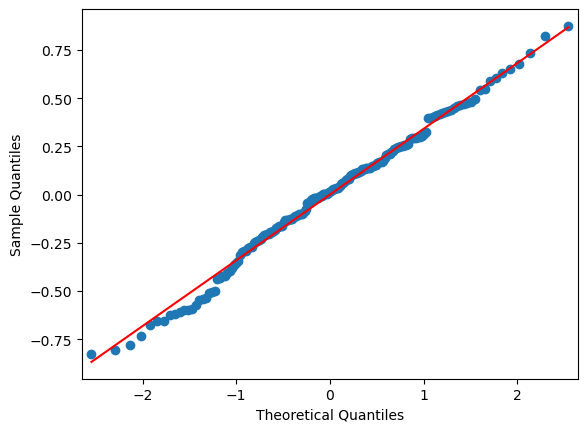

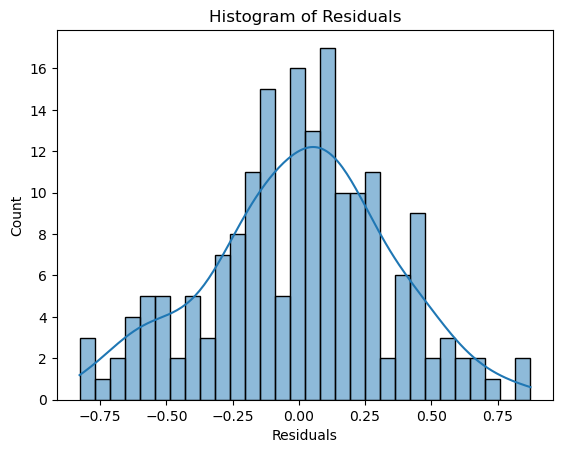

In [69]:
shapiro_test = stats.shapiro(model_sp_final.resid)
print(f"Shapiro-Wilk test: {shapiro_test}")

# Q-Q plot
sm.qqplot(model_sp_final.resid, line='s')
plt.show()

# Гистограмма остатков
sns.histplot(model_sp_final.resid, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

In [70]:
from scipy.stats import zscore
outlier_indices = model_sp_final.resid[abs(zscore(model_sp_final.resid)) > 2.6].index
print("Индексы выбросов:")
print(outlier_indices)

Индексы выбросов:
Index([], dtype='int64')


In [71]:
from statsmodels.stats.stattools import durbin_watson
print("Статистика Дарбина-Уотсона:", durbin_watson(model_sp_final.resid))

Статистика Дарбина-Уотсона: 1.8965568953106142


In [72]:
stargazer = Stargazer([model_rt1, model_rt2, model_rt3, model_rt_final])
stargazer.custom_columns(["Модель 1", "Модель 2", "Модель 3", "Модель Итог"], [1, 1, 1, 1])
stargazer

In [73]:
stargazer = Stargazer([model_sp1, model_sp2, model_sp3, model_sp_final])
stargazer.custom_columns(["Модель 1", "Модель 2", "Модель 3", "Модель Итог"], [1, 1, 1, 1])
stargazer